# Задание
Выберите ваше любимое непрерывное распределение (чем меньше оно будет похоже на нормальное, тем интереснее; попробуйте выбрать какое-нибудь распределение из тех, что мы не обсуждали в курсе). Сгенерируйте из него выборку объёма 1000, постройте гистограмму выборки и нарисуйте поверх неё теоретическую плотность распределения вашей случайной величины (чтобы величины были в одном масштабе, не забудьте выставить у гистограммы значение параметра normed=true).

Ваша задача — оценить распределение выборочного среднего вашей случайной величины при разных объёмах выборок. Для этого при трёх и более значениях n (например, 5, 10, 50) сгенерируйте 1000 выборок объёма n и постройте гистограммы распределений их выборочных средних. Используя информацию о среднем и дисперсии исходного распределения (её можно без труда найти в википедии), посчитайте значения параметров нормальных распределений, которыми, согласно центральной предельной теореме, приближается распределение выборочных средних. Обратите внимание: для подсчёта значений этих параметров нужно использовать именно теоретические среднее и дисперсию вашей случайной величины, а не их выборочные оценки. Поверх каждой гистограммы нарисуйте плотность соответствующего нормального распределения (будьте внимательны с параметрами функции, она принимает на вход не дисперсию, а стандартное отклонение).

Опишите разницу между полученными распределениями при различных значениях n. Как меняется точность аппроксимации распределения выборочных средних нормальным с ростом n?

Решение должно представлять собой IPython-ноутбук, содержащий:

1. код, генерирующий выборки и графики;
2. краткие описания каждого блока кода, объясняющие, что он делает;
3. необходимые графики (убедитесь, что на них подписаны оси);
4. выкладки с вычислениями параметров нормальных распределений, аппроксимирующих выборочные средние при различных n;
5. выводы по результатам выполнения задания.

In [155]:
# Импортируем библиотеки
import math
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts

# Выбереме непрерывное распределение из реализованных в scipy.stats https://docs.scipy.org/doc/scipy/reference/stats.html
# Выбереме распределение Gilbrat https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gilbrat.html#scipy.stats.gilbrat
from scipy.stats import gilbrat as resFunction

# Пример для степенной expon
# from scipy.stats import expon as resFunction

# Сформируем выборку из 1000 значений
r = resFunction.rvs(size=1000)

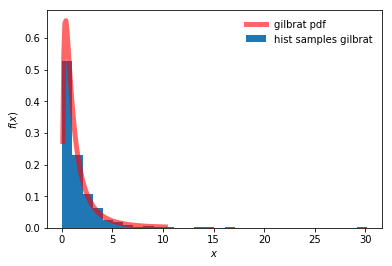

In [156]:
# Построим гистрограмму
plt.hist(r, bins=30, density=True, label='hist samples gilbrat')
plt.ylabel('$f(x)$')
plt.xlabel('$x$')

# Построим теоретическую плотность распределения
left = resFunction.ppf(0.01)
rigt = resFunction.ppf(0.99)
x = np.linspace(left,rigt, 100)
plt.plot(x, resFunction.pdf(x), 'r-', lw=5, alpha=0.6, label='gilbrat pdf')
plt.legend(loc='best', frameon=False)
plt.show()

In [157]:
# Определим параметры распределения
mean, var, skew, kurt = resFunction.stats(moments='mvsk') 
# Где mean - мат.ожидание = EX, mu, где var = дисперсионное отклонение = DX, sigma ** 2
print 'мат.ожидание:', mean, 'дисперсия:', var

мат.ожидание: 1.6487212707001282 дисперсия: 4.670774270471604


In [158]:
#######################################################################
# Функция построения графиков гистограммы и распределения, для выборки объема n
# mean - мат.ожидание
# var - дисперсионное отклоенине
# n - объем выборки
#######################################################################

def graphicVariance(mean, var, n):
    # Формируем выборку значений по функции
    variableValue = np.array([resFunction.rvs(size = n) for x in range(1000)])
   
    # Вычисление выборочных средних
    meanVal = variableValue.mean(axis = 1)

    # Строим гистограмму   
    plt.hist(meanVal, density=True, label='hist samples variable (n): ' + str(n))
    plt.ylabel('$f(x)$')
    plt.xlabel('$x$')
    
    # Параметры нормального распределения
    sigma = math.sqrt(var / n)
    print 'Мат. ожидание:' , mean, 'Стандартное отклонение:', sigma
    
    # Нормальное распределенние
    normRV = sts.norm(loc = mean, scale = sigma)
                    
    x = np.linspace(left,rigt, 100) # Ось x по параметрам функции
    plt.plot(x, normRV.pdf(x), 'r-', lw=5, alpha=0.6, label='normal pdf (n): ' + str(n))
    plt.legend(loc='best', frameon=False)
    plt.show()                  
    

Мат. ожидание: 1.6487212707001282 Стандартное отклонение: 1.52819734826


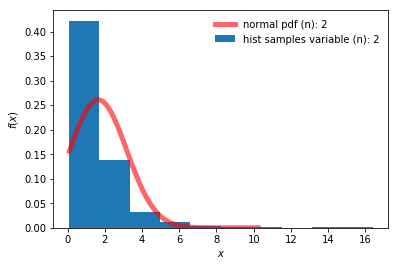

Мат. ожидание: 1.6487212707001282 Стандартное отклонение: 0.966516866948


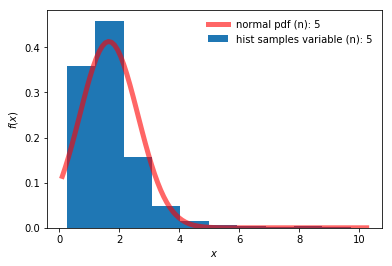

Мат. ожидание: 1.6487212707001282 Стандартное отклонение: 0.68343063075


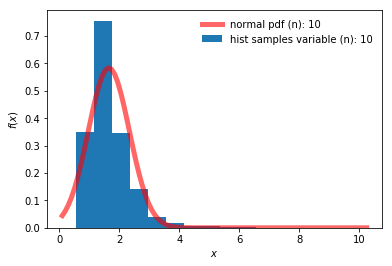

Мат. ожидание: 1.6487212707001282 Стандартное отклонение: 0.305639469652


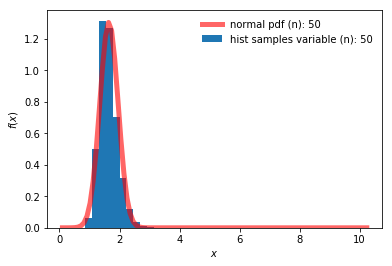

Мат. ожидание: 1.6487212707001282 Стандартное отклонение: 0.0966516866948


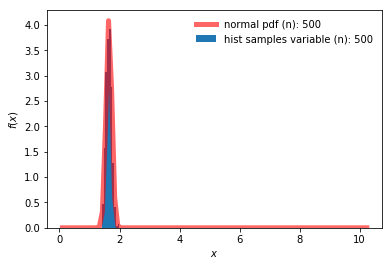

In [159]:
for n in [2, 5, 10, 50, 500]:
    graphicVariance(mean, var, n)

# Выводы
Опишите разницу между полученными распределениями при различных значениях n. Как меняется точность аппроксимации распределения выборочных средних нормальным с ростом n?

## Описание выводов:
Полученные распределения показывают уменьшение стандартного отклонения и от нормальной функции и с ростом n показывают рост точности апроксимации распределения выборочных средних